<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Food Delivery Cost And Profitability Analysis Using Python
</div>

# Importing the necessary Python Libraries

In [53]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Read the CSV file

In [3]:
df=pd.read_csv("C:\\Users\\hp\\Downloads\\food_orders_new_delhi.csv")

In [4]:
df.head(10)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0
5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150
6,7,C1466,R2457,2024-01-12 23:55:48,2024-01-13 00:48:48,303,30,Digital Wallet,5% on App,144,12,50
7,8,C5426,R2978,2024-01-26 22:46:24,2024-01-27 00:36:24,260,0,Credit Card,10%,55,19,0
8,9,C6578,R2877,2024-01-02 18:29:59,2024-01-02 20:23:59,1663,40,Cash on Delivery,5% on App,116,48,0
9,10,C9322,R2161,2024-01-05 00:50:19,2024-01-05 02:10:19,491,40,Digital Wallet,10%,189,10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [6]:
df.shape

(1000, 12)

### This Dataset contains 1000 entries and 12 columns,with no missing values in any columns.Now We need to perform some **Data Cleaning** and preparation.Below are the necessary cleaning steps we need to take:

# Cleaning Steps
- Convert "Order Date and Time" and "Delivery Date and Time" to a datetime format

In [7]:
df["Order Date and Time"]=pd.to_datetime(df["Order Date and Time"])

In [8]:
df["Delivery Date and Time"]=pd.to_datetime(df["Delivery Date and Time"])

## Convert "discounts and offers" to a consistent numeric value or calculate the discount amount

In [9]:
df["Discounts and Offers"].unique()

array(['5% on App', '10%', '15% New User', 'None', '50 off Promo'],
      dtype=object)

In [10]:
def extract(value):
    a=str(value).split()
    return a[0]
df["Discounts and Offers"]=df["Discounts and Offers"].apply(extract)

In [11]:
df["Discounts and Offers"]=df["Discounts and Offers"].str.replace("None","0")

In [12]:
def removep(value):
    if "%" in value:
        a=value.replace("%","")
        return float(a)
    else:
        return float(value)
df["Discounts and Offers"] =df["Discounts and Offers"].apply(removep)   

## Calculate discount amount

In [13]:
df.loc[(df["Discounts and Offers"]<=15),"Discounts and Offers"]=(df["Discounts and Offers"]/100)*df["Order Value"]

## the data is now ready with the following adjustmnets:
    - Order Date and Time and Delivery date and Tme columns have been converted to datetime format.
    - discount amount has been calculated based on the Discounts and offer column.

# Cost and Profitabilty Analysis

For the cost Analysis,we'll consider the following costs associated with each order:
- **Delivery Fee**: The fee charged for delivering the order,
- **Payment Processsing Fee**: The Fee for processing the payment.
- **Discount Amount**: The discount provided on the order

#### We'll calculate the total cost for the platform per order and then aggregate this data to understand the overall cost structure

In [14]:
df["TotalCosts"]=df["Delivery Fee"]+df["Discounts and Offers"]+df["Payment Processing Fee"]

In [15]:
df["Revenue"]=df["Commission Fee"]

In [16]:
df["Profit"]=df["Revenue"]- df["TotalCosts"]

# Aggregate data

In [17]:
Total_Orders=df.shape[0]
Total_Revenue=df["Revenue"].sum()
Total_Costs=df["TotalCosts"].sum()
Total_Profit=df["Profit"].sum()


In [18]:
Overall_Analysis={"Total Orders":Total_Orders,"Total Revenue":Total_Revenue,"Total Costs":Total_Costs,"Total_Profit":Total_Profit}

In [19]:
for key,value in Overall_Analysis.items():
    print(f"{key}:{value}\n")

Total Orders:1000

Total Revenue:126990

Total Costs:132741.85

Total_Profit:-5751.85



# The analysis indicates that the total costs associated with the food delivery operation exceed the total revenue generated from commission fees,resulting in a net loss.It suggests that the cuurent commission rates,delivery fees and discount stategues might not be sustainable for profitablity 

# To Better Understand the Distribution of Costs,Revenue and Profit

In [20]:
cost_dist=df[["Delivery Fee","Discounts and Offers","Payment Processing Fee"]].sum()
cost_dist

Delivery Fee              28620.00
Discounts and Offers      74289.85
Payment Processing Fee    29832.00
dtype: float64

# Proportion of Total Costs In Food Delivery

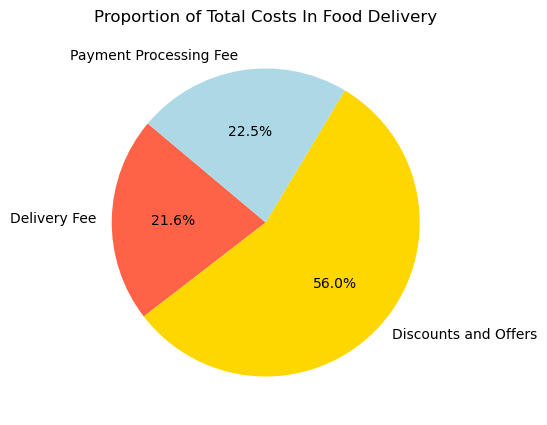

In [21]:
plt.figure(figsize=(5,5))
plt.pie(cost_dist,labels=cost_dist.index,autopct="%1.1f%%",startangle=140,colors=["tomato","gold","lightblue"])
plt.title('Proportion of Total Costs In Food Delivery')
plt.show()

# The pie chart illustrates that the breakdown of total costs into delivery fees,payment processisng fee and discount and offers.
# Discount constitute a significant portion of the costs ,suggesting that promotional strategies miht be heavily impacting the overall profitablity

# Total Revenue,Costs and Profit

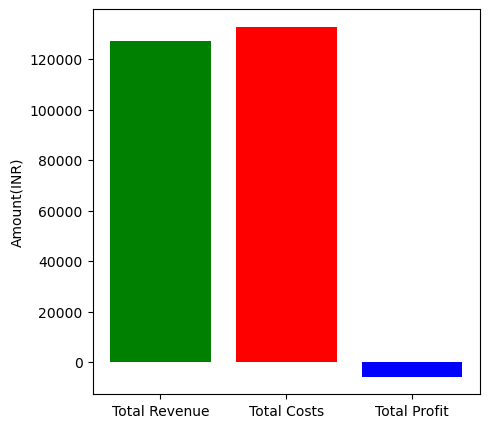

In [22]:
totals=["Total Revenue","Total Costs","Total Profit"]
values=[Total_Revenue,Total_Costs,Total_Profit]
plt.figure(figsize=(5,5))
plt.bar(totals,values,color=["green","red","blue"])
plt.ylabel("Amount(INR)")
plt.show()

# The bar chart compares total revenue,total costs and total profit.it visually represents the gap between revenue and costs,clearly showing that the costs surpass the revenue,leading to the total loss.

# Proportion of Payment Method In Food Delivery

In [24]:
Payment_Method=df["Payment Method"].value_counts()

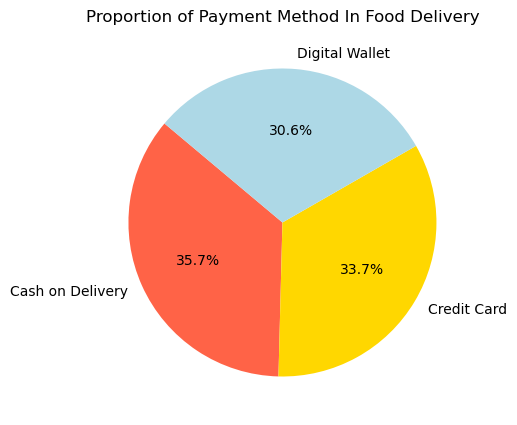

In [25]:
plt.figure(figsize=(5,5))
plt.pie(Payment_Method,labels=Payment_Method.index,autopct="%1.1f%%",startangle=140,colors=["tomato","gold","lightblue"])
plt.title('Proportion of Payment Method In Food Delivery')
plt.show()

# Mostly people using the cash on delievery for paying the amount.

# featuring Engineering : 
Extracting date,time,year,month,monthname,day,dayname

In [ ]:
type(df["Order Date and Time"])

In [29]:
df["date"]=[d.date() for d in df["Order Date and Time"]]

In [37]:
df["time"]=[d.time() for d in df["Order Date and Time"]]

In [32]:
df["date"]=pd.to_datetime(df["date"])

In [39]:
df["Year"]=df.date.dt.year

In [41]:
df["month"]=df.date.dt.month

In [43]:
df["day"]=df.date.dt.day

In [45]:
df["day_name"]=df.date.dt.day_name()

In [68]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,...,Refunds/Chargebacks,TotalCosts,Revenue,Profit,date,time,Year,month,day,day_name
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,95.70,150,...,0,142.70,150,7.30,2024-02-01,01:11:52,2024,February,1,Thursday
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,98.60,198,...,0,161.60,198,36.40,2024-02-02,22:11:04,2024,February,2,Friday
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,140.55,195,...,0,215.55,195,-20.55,2024-01-31,05:54:35,2024,January,31,Wednesday
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0.00,146,...,0,77.00,146,69.00,2024-01-16,22:52:49,2024,January,16,Tuesday
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50.00,130,...,0,130.00,130,0.00,2024-01-29,01:19:30,2024,January,29,Monday


# Peak Month 

<Axes: xlabel='month', ylabel='TotalCosts'>

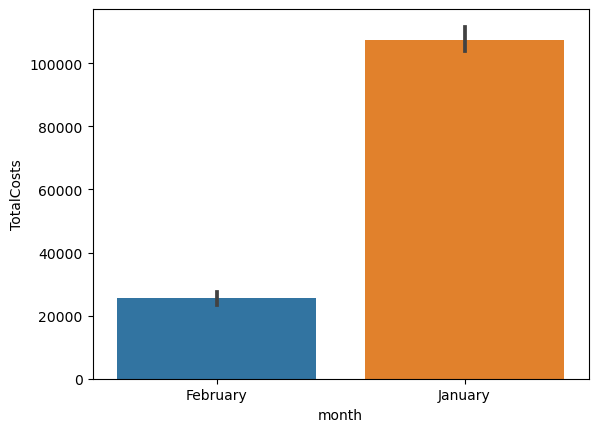

In [74]:
sns.barplot(x="month",y="TotalCosts",data=df,estimator=sum)

# Peak Day

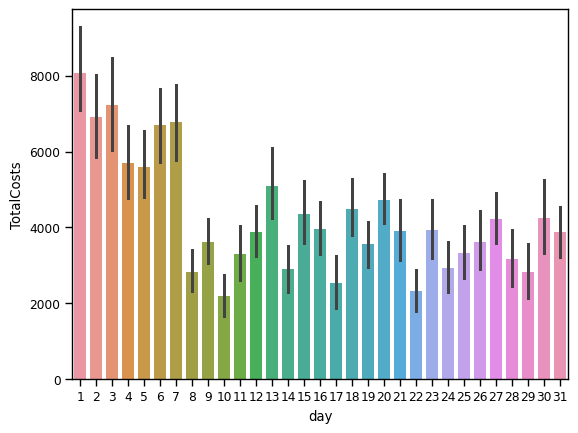

In [100]:
sns.barplot(x="day",y="TotalCosts",data=df,estimator=sum)
sns.set_context("paper",rc={"figure.figsize":(15,15)})

# Peak Day

<Axes: xlabel='day_name', ylabel='TotalCosts'>

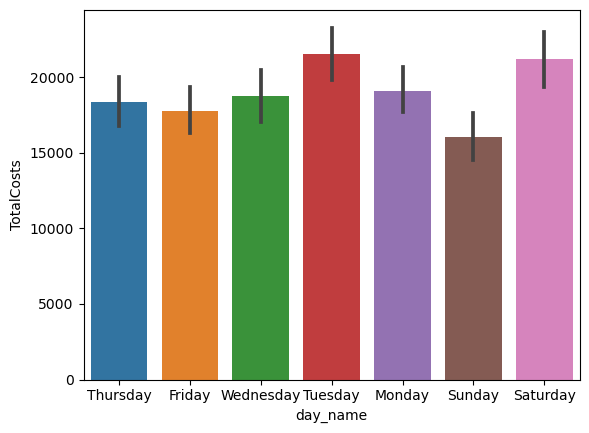

In [82]:
sns.barplot(x="day_name",y="TotalCosts",data=df,estimator=sum)

# January is the peak month and tuesday is the peak day for the restuarant.

# So in this we can analyse the cost and profitability of a food delivery company.